CLASIFICADOR DE SETAS CON MACHINE LEARNING 

In [3]:
# IMPORTS

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pickle
palette=sns.color_palette('Set2')

# 1. convertir csv en dataframe

mdata = pd.read_csv("../data/raw/mushroom_data.csv", sep=';')
mdata.shape

(61069, 21)

2. EDA

2.1 borrar duplicados

In [4]:
smdata = mdata.drop_duplicates()  
smdata.shape

(60923, 21)

eliminamos duplicados: de 61069 a 60923 = 146 duplicados

2.2 obtener info sobre la DF y valores nulos

In [5]:
smdata.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 60923 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 60923 non-null  object 
 1   cap-diameter          60923 non-null  float64
 2   cap-shape             60923 non-null  object 
 3   cap-surface           46803 non-null  object 
 4   cap-color             60923 non-null  object 
 5   does-bruise-or-bleed  60923 non-null  object 
 6   gill-attachment       51068 non-null  object 
 7   gill-spacing          35861 non-null  object 
 8   gill-color            60923 non-null  object 
 9   stem-height           60923 non-null  float64
 10  stem-width            60923 non-null  float64
 11  stem-root             9387 non-null   object 
 12  stem-surface          22801 non-null  object 
 13  stem-color            60923 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color            74

Hay varias columnas con un alto numero de valores faltantes. Más adelante nos encargaremos de completarlas.  

2.3 Analisis descriptivo: 

In [6]:
smdata.describe()

,cap-diameter,stem-height,stem-width
count,60923.000000,60923.000000,60923.000000
mean,6.741957,6.597202,12.178484
std,5.268435,3.358757,10.030361
min,0.380000,0.000000,0.000000
25%,3.490000,4.650000,5.250000
50%,5.880000,5.960000,10.220000
75%,8.550000,7.750000,16.580000
max,62.340000,33.920000,103.910000


Conclusiones Generales

 - Variabilidad: Todas las variables muestran una variabilidad considerable, con desviaciones estándar altas en comparación con sus medias. Esto sugiere que las características físicas de los hongos en el conjunto de datos varían ampliamente.

 - Valores Extremos: La presencia de valores mínimos de 0 en stem-height y stem-width podría indicar errores en los datos o valores faltantes. 

 - Distribución Asimétrica: Las diferencias significativas entre las medianas y las medias, especialmente en stem-width, sugieren que la distribución de los datos podría tener valores atípicos.

Este análisis descriptivo nos da una base para entender la distribución y las características de las variables en el dataset de setas. Es un primer paso crucial antes de proceder con análisis más complejos o modelos predictivos.

Crear un gráfico de barras para contar el numero de casos para cada valor de la CLASE TARGET

/tmp/ipykernel_722/3077304555.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=smdata, palette=['blue', 'orange'])


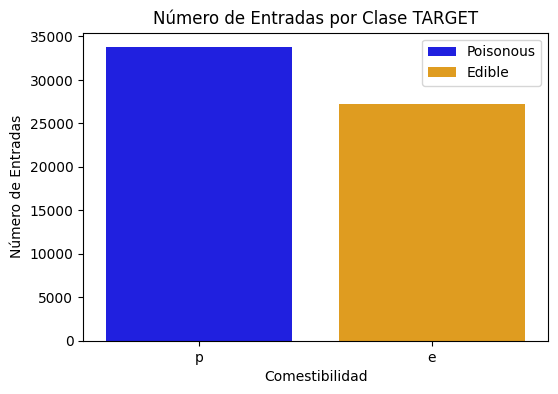

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=smdata, palette=['blue', 'orange'])
plt.title('Número de Entradas por Clase TARGET')
plt.legend(labels=["Poisonous","Edible"])
plt.xlabel('Comestibilidad')
plt.ylabel('Número de Entradas')
plt.show()

La proporcion de valores esta relativamente bien claramente inclinada hacia los casos "no comestibles" pero hay tambien un alto numero de casos "comestibles"

In [8]:
smdata.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


Graficar las variables categoricas en histogramas

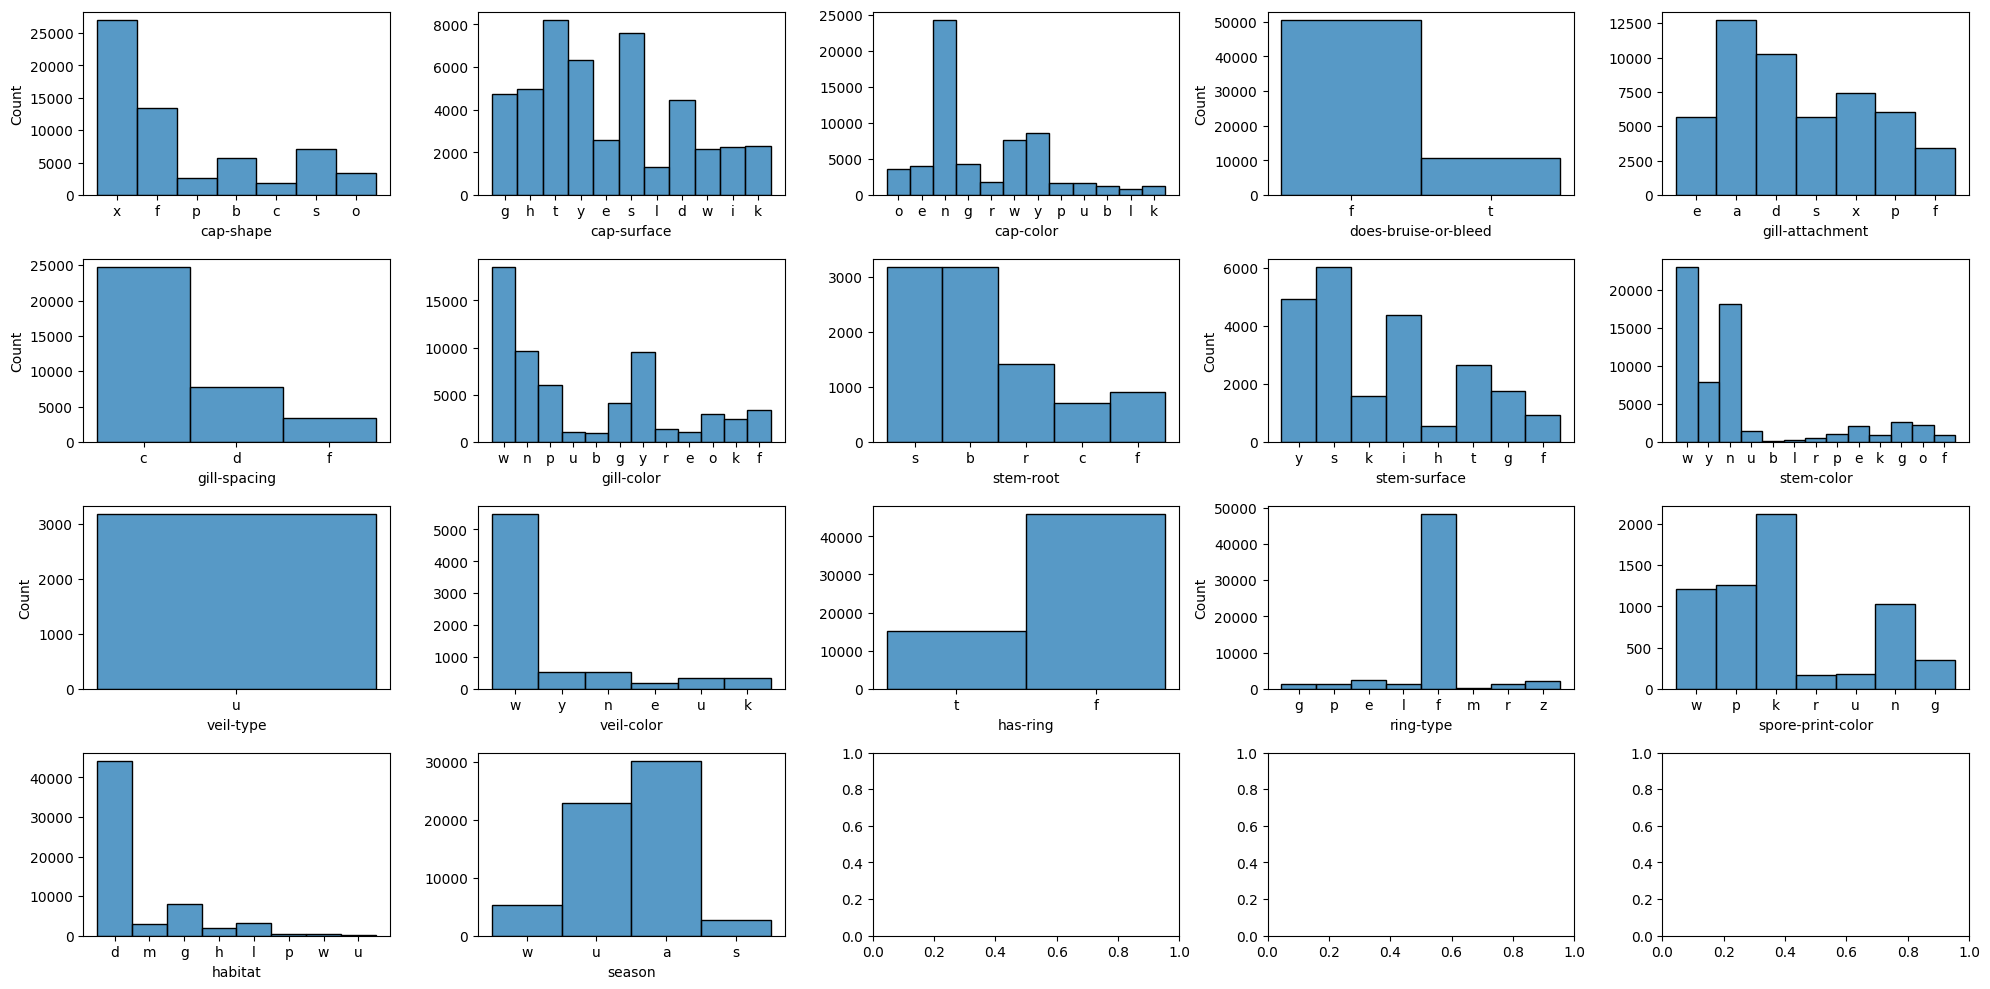

In [9]:


fig, axis = plt.subplots(4, 5, figsize = (20, 10))

# Create a multiple histogram

sns.histplot(ax = axis[0, 0], data = smdata, x = 'cap-shape')
sns.histplot(ax = axis[0, 1], data = smdata, x = 'cap-surface').set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = smdata, x = 'cap-color').set(ylabel = None)
sns.histplot(ax = axis[0, 3], data = smdata, x = 'does-bruise-or-bleed')
sns.histplot(ax = axis[0, 4], data = smdata, x = 'gill-attachment').set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = smdata, x = 'gill-spacing')
sns.histplot(ax = axis[1, 1], data = smdata, x = 'gill-color').set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = smdata, x = 'stem-root').set(ylabel = None)
sns.histplot(ax = axis[1, 3], data = smdata, x = 'stem-surface')
sns.histplot(ax = axis[1, 4], data = smdata, x = 'stem-color').set(ylabel = None)
sns.histplot(ax = axis[2, 0], data = smdata, x = 'veil-type')
sns.histplot(ax = axis[2, 1], data = smdata, x = 'veil-color').set(ylabel = None)
sns.histplot(ax = axis[2, 2], data = smdata, x = 'has-ring').set(ylabel = None)
sns.histplot(ax = axis[2, 3], data = smdata, x = 'ring-type')
sns.histplot(ax = axis[2, 4], data = smdata, x = 'spore-print-color').set(ylabel = None)
sns.histplot(ax = axis[3, 0], data = smdata, x = 'habitat').set(ylabel = None)
sns.histplot(ax = axis[3, 1], data = smdata, x = 'season').set(ylabel = None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Conclusiones del histograma:  

 - Algunas variables tienen valor claramente predominante: habitat, ring-type, veil-color, y algo menos en otras como cap-color
 - la variable "veil-type", ademas de tener solo 3177 non-null, tiene todos sus valores iguales (u=universal), con lo cual podemos eliminarla

In [10]:
if 'veil-type' in smdata.columns:
    smdata.drop(['veil-type'], axis=1, inplace=True)

smdata.info()
# columna "veil-type" eliminada

<class 'pandas.core.frame.DataFrame'>
Index: 60923 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 60923 non-null  object 
 1   cap-diameter          60923 non-null  float64
 2   cap-shape             60923 non-null  object 
 3   cap-surface           46803 non-null  object 
 4   cap-color             60923 non-null  object 
 5   does-bruise-or-bleed  60923 non-null  object 
 6   gill-attachment       51068 non-null  object 
 7   gill-spacing          35861 non-null  object 
 8   gill-color            60923 non-null  object 
 9   stem-height           60923 non-null  float64
 10  stem-width            60923 non-null  float64
 11  stem-root             9387 non-null   object 
 12  stem-surface          22801 non-null  object 
 13  stem-color            60923 non-null  object 
 14  veil-color            7413 non-null   object 
 15  has-ring              60

/tmp/ipykernel_722/220470769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smdata.drop(['veil-type'], axis=1, inplace=True)


In [11]:
ring_type_counts = smdata['ring-type'].value_counts()
print("\nFrecuencia de valores en 'ring-type':")
print(ring_type_counts)


Frecuencia de valores en 'ring-type':
ring-type
f    48215
e     2435
z     2118
l     1427
r     1399
p     1265
g     1240
m      353
Name: count, dtype: int64


De 60903 valores, 48215 son f=none. Es decir, que solo en un 20% de los casos existe un "ring".  

2.3 ANALISIS DE VARIABLES NUMERICAS

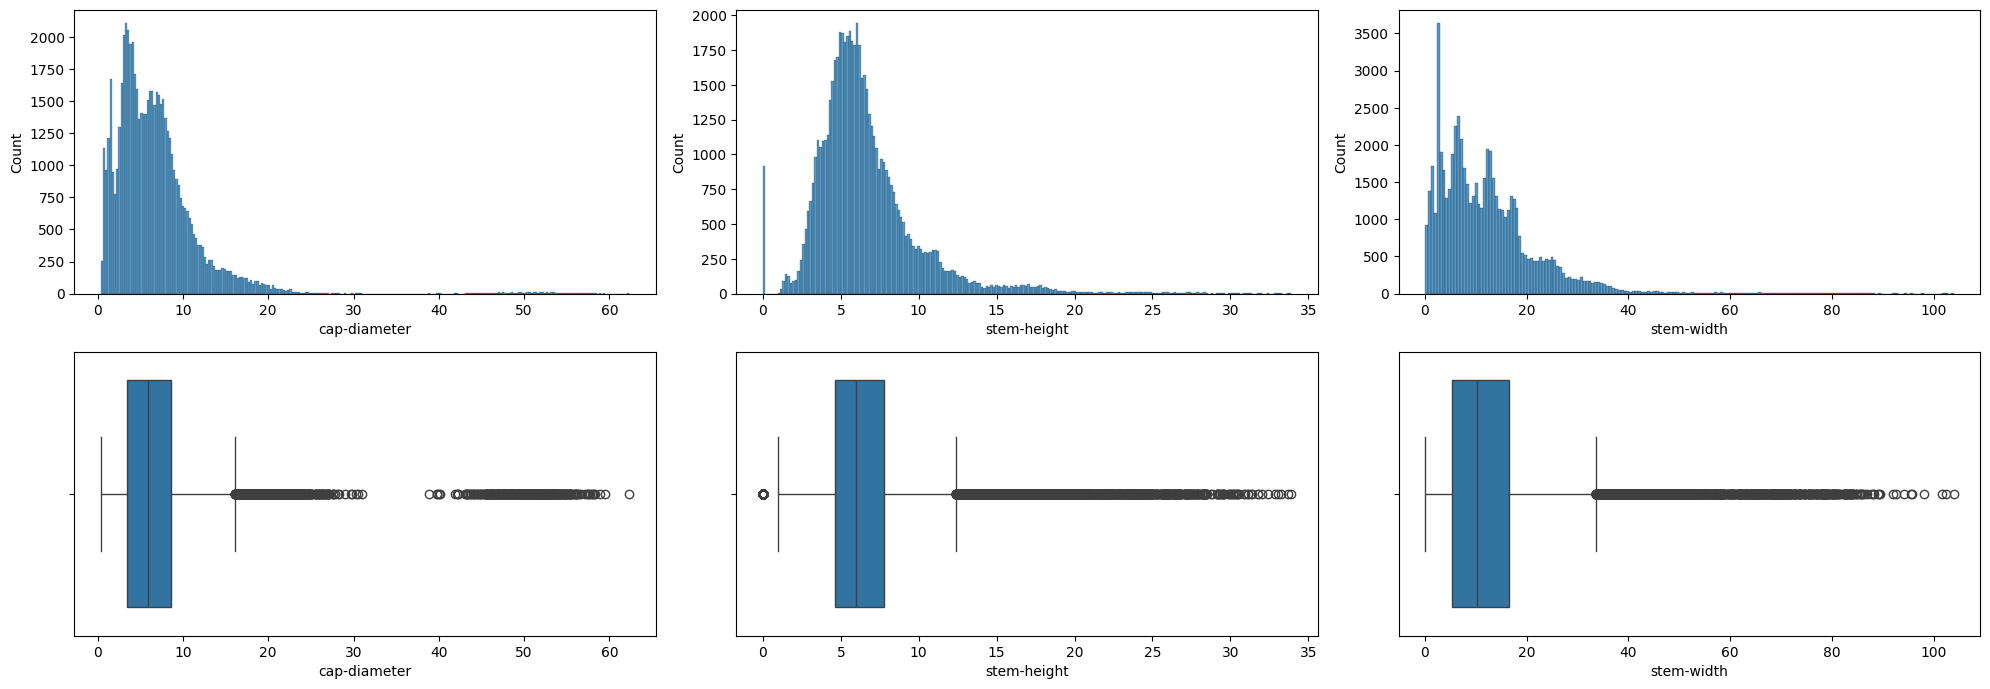

In [12]:

fig, axis = plt.subplots(2, 3, figsize = (20, 7))

# Creating a multiple figure with histograms

sns.histplot(ax = axis[0, 0], data = smdata, x = "cap-diameter")
sns.histplot(ax = axis[0, 1], data = smdata, x = "stem-height")
sns.histplot(ax = axis[0, 2], data = smdata, x = "stem-width")
sns.boxplot(ax = axis[1, 0], data = smdata, x = "cap-diameter")
sns.boxplot(ax = axis[1, 1], data = smdata, x = "stem-height")
sns.boxplot(ax = axis[1, 2], data = smdata, x = "stem-width")
# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Las 3 variables numericas tienen un numero importante de outliers. Dado el caracter de los datos (aunque haya muy poco valores atipicos, estos podrian ser determinantes a la hora de su comestibilidad) y el alto numero de variables que participan, parece lo mas prudente mantener los outliers. 

2.4 ANALISIS DE VARIABLES CATEGORICAS VS CATEGORICAS

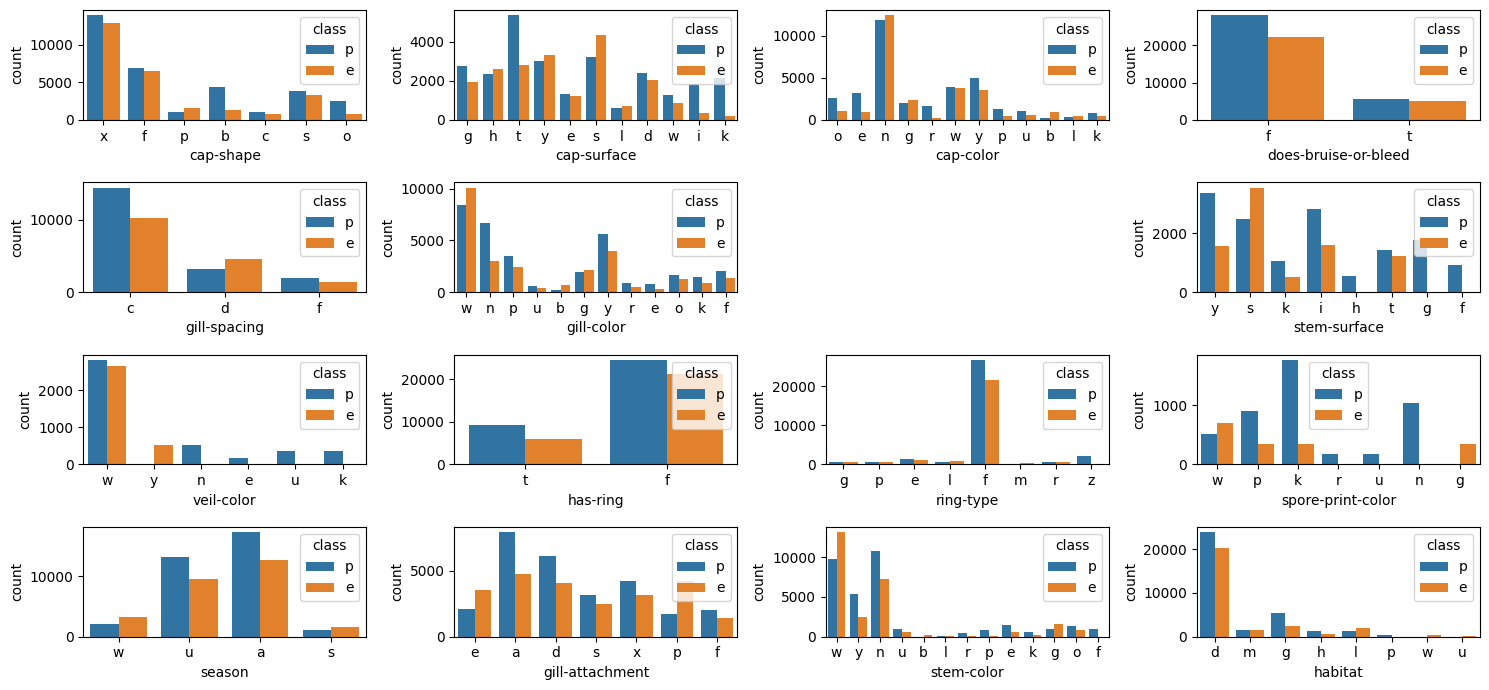

In [13]:
fig, axis = plt.subplots(4, 4, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = smdata, x = 'cap-shape', hue = "class")
sns.countplot(ax = axis[0, 1], data = smdata, x = 'cap-surface', hue = "class")
sns.countplot(ax = axis[0, 2], data = smdata, x = 'cap-color', hue = "class")
sns.countplot(ax = axis[0, 3], data = smdata, x = 'does-bruise-or-bleed', hue = "class")
sns.countplot(ax = axis[1, 0], data = smdata, x = 'gill-spacing', hue = "class")
sns.countplot(ax = axis[1, 1], data = smdata, x = 'gill-color', hue = "class")
sns.countplot(ax = axis[1, 2], data = smdata, x = 'stem-root', hue = "class")
sns.countplot(ax = axis[1, 3], data = smdata, x = 'stem-surface', hue = "class")
sns.countplot(ax = axis[2, 0], data = smdata, x = 'veil-color', hue = "class")
sns.countplot(ax = axis[2, 1], data = smdata, x = 'has-ring', hue = "class")
sns.countplot(ax = axis[2, 2], data = smdata, x = 'ring-type', hue = "class")
sns.countplot(ax = axis[2, 3], data = smdata, x = 'spore-print-color', hue = "class")
sns.countplot(ax = axis[3, 0], data = smdata, x = 'season', hue = "class")
sns.countplot(ax = axis[3, 1], data = smdata, x = 'gill-attachment', hue = "class")
sns.countplot(ax = axis[3, 2], data = smdata, x = 'stem-color', hue = "class")
sns.countplot(ax = axis[3, 3], data = smdata, x = 'habitat', hue = "class")

plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

Conclusion clave sobre los datos:  

 - ninguna de las caracteristicas por si misma parece determinante de la clase, pero algunoos valores parecen ser mayor factor de determinacion que otros, debido al mayor numero de casos. Ejemplo: ring-type=f; habitat=t; veil-color=w; cap-color=n;  
 - Los datos apuntan a que la determinacion proceda de combinaciones de distintas variables con ciertos valores. Por ejemplo; la combinacion: spore-print-color=k/n + cap-surface=t + stem-surface=y tiene una alta probabilidad de ser venenosa (p)

2.5 ANALISIS DE CORRELACION ENTRE VARIABLES CATEGORICAS binarias y numericas

- factorizamos variables categoricas binarias (para las multiples usaremos label-encoding)

In [14]:
smdata["class"] = pd.factorize(smdata["class"])[0]
smdata["does-bruise-or-bleed"] = pd.factorize(smdata["does-bruise-or-bleed"])[0]
smdata["has-ring"] = pd.factorize(smdata["has-ring"])[0]

# var_categoricas = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
# 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']       

/tmp/ipykernel_722/150011892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smdata["class"] = pd.factorize(smdata["class"])[0]
/tmp/ipykernel_722/150011892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smdata["does-bruise-or-bleed"] = pd.factorize(smdata["does-bruise-or-bleed"])[0]
/tmp/ipykernel_722/150011892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

2.5 Analisis de correlacion

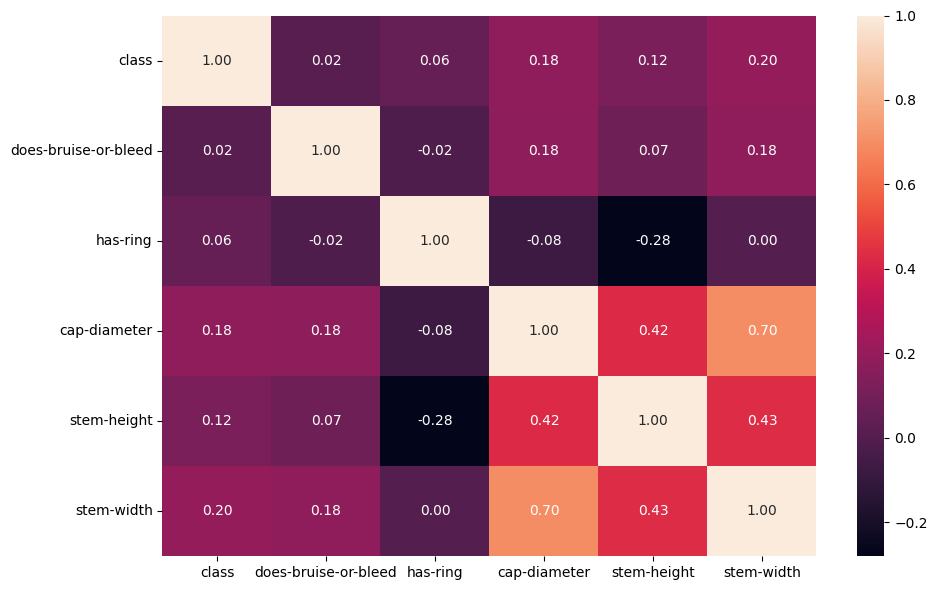

In [15]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(smdata[["class", "does-bruise-or-bleed", "has-ring", "cap-diameter", "stem-height", "stem-width"]].corr(), annot = True, fmt = ".2f")
plt.tight_layout()
plt.show()

En esta primera matriz de correlacion se puede ver que hay variables que tiene un impacto de practicamente cero sobre la clase target. Por tanto, vamos a eliminarlas de los datos de entrenamiento.
- 'does-bruise-or-bleed' tiene un indice de correlacion de 0.02  
- 'has-ring' tiene un indice de correlacion de 0.06
- 'ring-type' es dependiente de 'has-ring' y ya vimos en el anterior analisis que tiene un valor = falso en el 80% de los casos 

In [16]:
smdata_dis = smdata.drop(['does-bruise-or-bleed', 'has-ring', 'ring-type'], axis=1)
smdata_dis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60923 entries, 0 to 61068
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   class              60923 non-null  int64  
 1   cap-diameter       60923 non-null  float64
 2   cap-shape          60923 non-null  object 
 3   cap-surface        46803 non-null  object 
 4   cap-color          60923 non-null  object 
 5   gill-attachment    51068 non-null  object 
 6   gill-spacing       35861 non-null  object 
 7   gill-color         60923 non-null  object 
 8   stem-height        60923 non-null  float64
 9   stem-width         60923 non-null  float64
 10  stem-root          9387 non-null   object 
 11  stem-surface       22801 non-null  object 
 12  stem-color         60923 non-null  object 
 13  veil-color         7413 non-null   object 
 14  spore-print-color  6326 non-null   object 
 15  habitat            60923 non-null  object 
 16  season             60923 no

Reemplazamos los NAN con valor "q"

 - columnas donde hay que reemplazar los nan con "q"
 - Reemplazar los NaN en las columnas especificadas con un valor "q"
 - comprobamos los NAN despues del reemplazo

RESULTADO: todos los valores Nan reemplazados por "q". Estos valores significaban que la caracteristica determinada no existia (era "false"), reemplazarlos por "q" tiene sentido, porque mas delante con label-encoding los valores "q" en cada caracteristica equivaldran a "no conocido" o "indeterminado"

In [17]:
variables_cat_con_nan = ['cap-surface' , 'gill-attachment', 'gill-spacing', 'stem-root', 'stem-surface', 'veil-color', 'spore-print-color']
smdata_dis[variables_cat_con_nan] = smdata_dis[variables_cat_con_nan].fillna('q')
smdata_dis.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 60923 entries, 0 to 61068
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   class              60923 non-null  int64  
 1   cap-diameter       60923 non-null  float64
 2   cap-shape          60923 non-null  object 
 3   cap-surface        60923 non-null  object 
 4   cap-color          60923 non-null  object 
 5   gill-attachment    60923 non-null  object 
 6   gill-spacing       60923 non-null  object 
 7   gill-color         60923 non-null  object 
 8   stem-height        60923 non-null  float64
 9   stem-width         60923 non-null  float64
 10  stem-root          60923 non-null  object 
 11  stem-surface       60923 non-null  object 
 12  stem-color         60923 non-null  object 
 13  veil-color         60923 non-null  object 
 14  spore-print-color  60923 non-null  object 
 15  habitat            60923 non-null  object 
 16  season             60923 no

TEST CONVERSION DE NAN: comprabamos que todos los NAN han sido convertidos. 

In [18]:
unique_values_dict = {}

for column in smdata_dis:
    unique_values_dict[column] = smdata_dis[column].unique().tolist()

print(unique_values_dict)

{'class': [0, 1], 'cap-diameter': [15.26, 16.6, 14.07, 14.17, 14.64, 15.34, 14.85, 14.86, 12.85, 13.55, 13.4, 17.37, 16.56, 15.37, 15.54, 15.19, 17.4, 16.16, 16.93, 13.0, 13.06, 17.23, 14.39, 15.56, 13.2, 13.9, 16.38, 13.3, 15.95, 16.58, 14.1, 13.81, 14.67, 14.23, 14.78, 15.08, 16.0, 14.76, 14.89, 13.05, 13.03, 15.09, 12.22, 15.12, 18.04, 12.27, 16.03, 16.51, 14.96, 15.9, 15.48, 15.63, 14.8, 15.07, 13.12, 13.82, 12.57, 12.55, 13.53, 16.84, 15.73, 11.46, 15.06, 16.15, 13.78, 16.77, 17.32, 18.65, 14.11, 16.25, 13.59, 17.3, 12.13, 12.29, 14.74, 15.13, 13.66, 14.16, 16.66, 15.55, 14.28, 16.92, 12.02, 13.69, 15.36, 15.22, 15.49, 12.16, 16.04, 16.31, 15.35, 11.17, 13.74, 14.62, 13.14, 15.53, 17.08, 17.09, 15.31, 16.11, 16.12, 14.19, 15.67, 11.35, 14.52, 14.41, 16.3, 13.36, 14.29, 14.51, 14.55, 14.97, 14.0, 13.93, 17.91, 14.43, 13.43, 13.04, 17.1, 15.03, 16.37, 11.02, 17.61, 17.54, 16.21, 14.94, 15.97, 13.56, 15.42, 13.49, 15.71, 12.26, 13.46, 16.59, 14.98, 13.7, 14.92, 12.0, 14.75, 11.77, 13

CORRECTO: los valores NaN han sido reemplazados por el string 'q' 

INGENIERIA DE CARACTERISTICAS

3.2 TRANSFORMAR VARIABLES CATEGORICAS A NUMERICAS CON LABEL-ENCODING

 - Creamos una copia del DataFrame original para mantener los datos originales, y despues un diccionario para guardar los LabelEncoders

In [19]:
from sklearn.preprocessing import LabelEncoder
import json

smdata_dis_encoded = smdata_dis.copy()

# Columnas categóricas a codificar
categorical_columns = ['cap-shape', 'cap-surface', 'cap-color','gill-attachment', 'gill-spacing', 'gill-color','stem-root', 'stem-surface', 'stem-color', 'veil-color','spore-print-color', 'habitat', 'season']

# Crear un diccionario para almacenar los LabelEncoders
label_encoders = {}

# Aplicar Label Encoding a cada columna categórica
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    smdata_dis_encoded[column] = label_encoders[column].fit_transform(smdata_dis[column])

# Crear un diccionario para almacenar los mapeos de los LabelEncoders
label_mappings = {}
for column, encoder in label_encoders.items():
    label_mappings[column] = {
        'classes': encoder.classes_.tolist()
    }

# Mostrar el DataFrame después de Label Encoding
print("\nDataFrame después de Label Encoding:")
print(smdata_dis_encoded)

print(label_mappings)
# categorical_col_final = ['cap-shape', 'gill-color', 'stem-surface', 'stem-color', 'veil-color','spore-print-color', 'season']



DataFrame después de Label Encoding:
       class  cap-diameter  cap-shape  cap-surface  cap-color  \
0          0         15.26          6            2          6   
1          0         16.60          6            2          6   
2          0         14.07          6            2          6   
3          0         14.17          2            3          1   
4          0         14.64          6            3          6   
...      ...           ...        ...          ...        ...   
61064      0          1.18          5            8         11   
61065      0          1.27          2            8         11   
61066      0          1.27          5            8         11   
61067      0          1.24          2            8         11   
61068      0          1.17          5            8         11   

       gill-attachment  gill-spacing  gill-color  stem-height  stem-width  \
0                    2             3          10        16.95       17.09   
1                    2     

Guardamos valores originales de las variables categoricas antes del Label-Encoding en un archivo JSON. La escritura del archivo JSON esta comentada para que no sobreescriba el JSON con los valores para el usuario, que estan editados a mano .

In [20]:
# Guardar los mapeos de los LabelEncoders
label_mappings = {}
for column, encoder in label_encoders.items():
    label_mappings[column] = {
        'classes': encoder.classes_.tolist()
    }

# with open('label_encoders.json', 'w') as file:
#     json.dump(label_mappings, file)

Guardamos el dataframe en SQL y hacemos una consulta a la DB para ver que los datos se han insertado correctamente.

In [21]:
import sqlite3

# Crear una conexión a una base de datos SQLite
conn = sqlite3.connect('../data/interim/datasetas.db')

# Convertir el DataFrame a una tabla SQL
smdata_dis_encoded.to_sql('mushrooms', conn, if_exists='replace', index=False)

# Consultar la DB para ver que los datos se han insertado correctamente
query_result = pd.read_sql('SELECT * FROM mushrooms', conn)
print("\nDatos en la tabla SQL 'mushrooms':")
print(query_result)

# Cerrar la conexión
conn.close()


Datos en la tabla SQL 'mushrooms':
       class  cap-diameter  cap-shape  cap-surface  cap-color  \
0          0         15.26          6            2          6   
1          0         16.60          6            2          6   
2          0         14.07          6            2          6   
3          0         14.17          2            3          1   
4          0         14.64          6            3          6   
...      ...           ...        ...          ...        ...   
60918      0          1.18          5            8         11   
60919      0          1.27          2            8         11   
60920      0          1.27          5            8         11   
60921      0          1.24          2            8         11   
60922      0          1.17          5            8         11   

       gill-attachment  gill-spacing  gill-color  stem-height  stem-width  \
0                    2             3          10        16.95       17.09   
1                    2       

SPLIT TRAIN Y TEST DATA

In [22]:
from sklearn.model_selection import train_test_split

X = smdata_dis_encoded.drop('class' , axis=1)
y = smdata_dis_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,cap-diameter,cap-shape,cap-surface,cap-color,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,spore-print-color,habitat,season
8113,4.93,2,0,0,7,0,10,5.89,3.71,0,6,6,3,4,3,0
4193,3.93,6,11,5,0,3,10,5.81,3.54,3,8,6,3,4,0,2
53184,6.59,6,9,5,4,1,11,6.04,12.49,3,6,6,3,4,2,2
21430,3.44,6,9,5,1,3,6,5.28,5.72,3,7,11,3,4,0,0
43191,7.48,6,11,10,5,3,3,8.49,14.95,5,5,11,3,4,0,2


 Escalado a los Datos de Entrenamiento y test. Usamos MinMaxScaler en los datos de entrenamiento y prueba (solo X) y mostramos los datos de pruerba escalados. 

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nDatos de entrenamiento escalados:")
print(X_train_scaled)
print("\nDatos de prueba escalados:")
print(X_test_scaled)


Datos de entrenamiento escalados:
       cap-diameter  cap-shape  cap-surface  cap-color  gill-attachment  \
0          0.073434   0.333333     0.000000   0.000000         1.000000   
1          0.057295   1.000000     1.000000   0.454545         0.000000   
2          0.100226   1.000000     0.818182   0.454545         0.571429   
3          0.049387   1.000000     0.818182   0.454545         0.142857   
4          0.114590   1.000000     1.000000   0.909091         0.714286   
...             ...        ...          ...        ...              ...   
48733      0.049548   0.833333     0.000000   0.545455         0.142857   
48734      0.132505   1.000000     0.090909   0.454545         0.000000   
48735      0.192059   0.333333     0.636364   0.454545         0.285714   
48736      0.081343   1.000000     0.727273   0.181818         0.857143   
48737      0.137508   0.500000     0.818182   0.545455         0.714286   

       gill-spacing  gill-color  stem-height  stem-width  stem-r

3. SELECCION DE CARACTERISTICAS. utilizamos SelectKBest para quedarnos solo con losa datos de mayor impacto. Con un valor de k = 10 eliminamos 6 características del conjunto de datos

In [24]:

from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 10)
selection_model.fit(X_train_scaled, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scaled), columns = X_train_scaled.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scaled), columns = X_test_scaled.columns.values[ix])

X_train_sel.head()


,cap-diameter,cap-shape,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,spore-print-color,season
0,0.073434,0.333333,0.173644,0.035704,0.0,0.750,0.500000,0.5,0.571429,0.000000
1,0.057295,1.000000,0.171285,0.034068,0.6,1.000,0.500000,0.5,0.571429,0.666667
2,0.100226,1.000000,0.178066,0.120200,0.6,0.750,0.500000,0.5,0.571429,0.666667
3,0.049387,1.000000,0.155660,0.055048,0.6,0.875,0.916667,0.5,0.571429,0.000000
4,0.114590,1.000000,0.250295,0.143875,1.0,0.625,0.916667,0.5,0.571429,0.666667


Guardamos train and test data en CSV

In [25]:
# X_train_sel["class"] = list(y_train)
# X_test_sel["class"] = list(y_test)

X_train_sel.to_csv("../data/processed/train_data.csv", index=False)
X_test_sel.to_csv("../data/processed/test_data.csv", index=False)

MODELO 1: NAIVE BAYES 

Comprobamos la distribucion de los datos para escoger una de las 3 implementaciones :

In [26]:
X_train_sel.describe()

,cap-diameter,cap-shape,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,spore-print-color,season
count,48738.000000,48738.000000,48738.000000,48738.000000,48738.000000,48738.000000,48738.000000,48738.000000,48738.000000,48738.000000
mean,0.102754,0.674409,0.194489,0.117210,0.585921,0.630153,0.703652,0.530452,0.555486,0.350992
std,0.085268,0.357000,0.099040,0.096604,0.174829,0.186495,0.267659,0.114035,0.117491,0.366932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050194,0.333333,0.137087,0.050332,0.600000,0.625000,0.500000,0.500000,0.571429,0.000000
50%,0.088767,0.833333,0.175708,0.098354,0.600000,0.625000,0.916667,0.500000,0.571429,0.333333
75%,0.132021,1.000000,0.228479,0.159561,0.600000,0.625000,0.916667,0.500000,0.571429,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Analisis: 

Características del sombrero y el tallo: Los atributos del sombrero y el tallo tienen medias y desviaciones estándar variables, lo que indica diversidad en las características físicas de los hongos en el conjunto de datos.

Características de color: La mayoría de las características de color (láminas, tallo, velo, esporada) tienen medias cercanas a 1, lo que sugiere una prevalencia de ciertos colores.

Distribución de clases: La media de la clase (0.448) sugiere que el conjunto de datos tiene una distribución relativamente equilibrada de setas comestibles (0) y venenosos (1), con una ligera inclinación hacia las setas no comestibles.

MODELO 1 - NAIVE BAYES - GAUSSIAN

Vamos a utilizar el clasificador Gaussian Naive Bayes (GaussianNB) para predecir si un hongo es comestible o venenoso basándonos en las características del conjunto de datos proporcionado. 

El algoritmo Gaussian Naive Bayes es apropiado para datos continuos y asume que los valores de los atributos se distribuyen de acuerdo a una distribución normal (gaussiana).

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# entrenamos el modelo
model = GaussianNB()
model.fit(X_train_sel, y_train)

# Realizar predicciones
y_pred = model.predict(X_test_sel)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

Evaluamos el modelo y mostramos resultados usando tres metricas distintas: accuracy, classification report y confusion matrix 

In [28]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 0.606893721789085
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.78      0.69      6820
           1       0.58      0.38      0.46      5365

    accuracy                           0.61     12185
   macro avg       0.60      0.58      0.58     12185
weighted avg       0.60      0.61      0.59     12185

Confusion Matrix:
[[5352 1468]
 [3322 2043]]


Graficamos la matriz de confusión para visualizar los datos y facilitar su analisis  

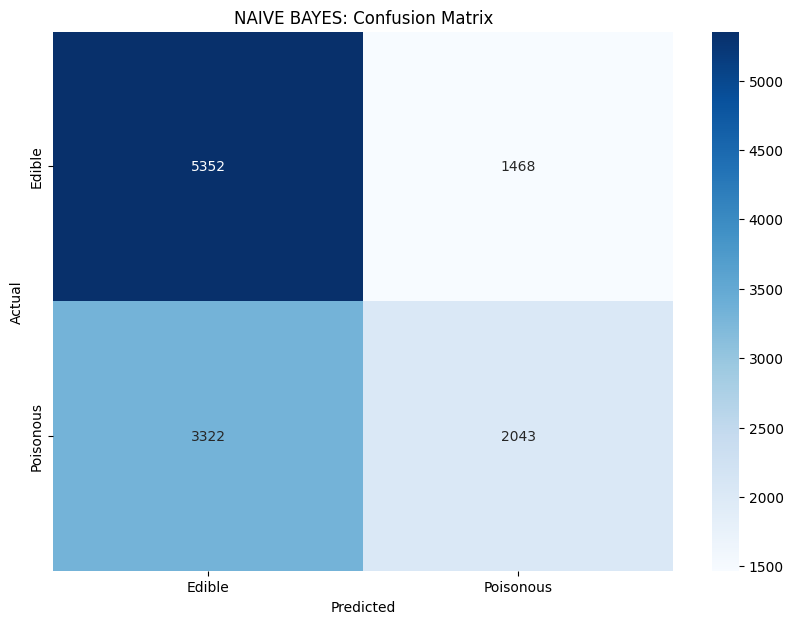

In [29]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('NAIVE BAYES: Confusion Matrix')
plt.show()

Analisis de la matriz de confusión

True Negatives (TN): 5352
False Positives (FP): 1468
False Negatives (FN): 3322
True Positives (TP): 2043

- La matriz de confusuon muestra un altisimo numero de falsos positivos y negativos.

Conclusiones

 - El recall bajo indica que el modelo tiene problemas para identificar correctamente los casos positivos (muchos falsos negativos).
 - La precision moderada pero no alta indica que hay una cantidad significativa de falsos positivos.
 - La accuracy del 60.71% es moderada y podría no ser suficiente dependiendo del dominio de aplicación.

Los resultados no son nada optimos asi que guardamos el modelo y probamos otro. Dejamos el ajuste de hiperparametros para un modelo con un resultado inicial mas optimo. 

NOTA IMPORTANTE: despues de un analisis mucho mas detallado de los datos, he observado que Naive Bayes en realidad no es un modelo en absoluto apropiado para este dataset, ya que tiene distribuciones irregulares y muchos outliers. Lo iba a eliminar del notebook, pero lo mantengo en el proyecto para que se vea la evolución del mismo.   

In [30]:
from pickle import dump
dump(model, open("../models/naive_bayes_default.sav", "wb"))

MODELO 2 : DECISION TREE

Nos decantamos por este modelo por varias razones: 

 - Facilidad de interpretación y visualización
 - Manejo de datos categóricos y numéricos sin demasiado preprocesamiento 
 - CLAVE: No requiere suposiciones sobre la distribución de los datos 
 - Manejan bien los datos faltantes
 - CLAVE: Identificación de interacciones entre variables: especialmennte util en este proyecto en particular. 
 - CLAVE: Eficiencia computacional: mayor velocidad de procesamiento en comparación con otros datos
 - CLAVE: Poca sensibilidad a los valores atípicos: especialmente util en este proyecto, donde hemos decidido mantener los outliers.  


In [31]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train_sel, y_train)

DecisionTreeClassifier(random_state=42)

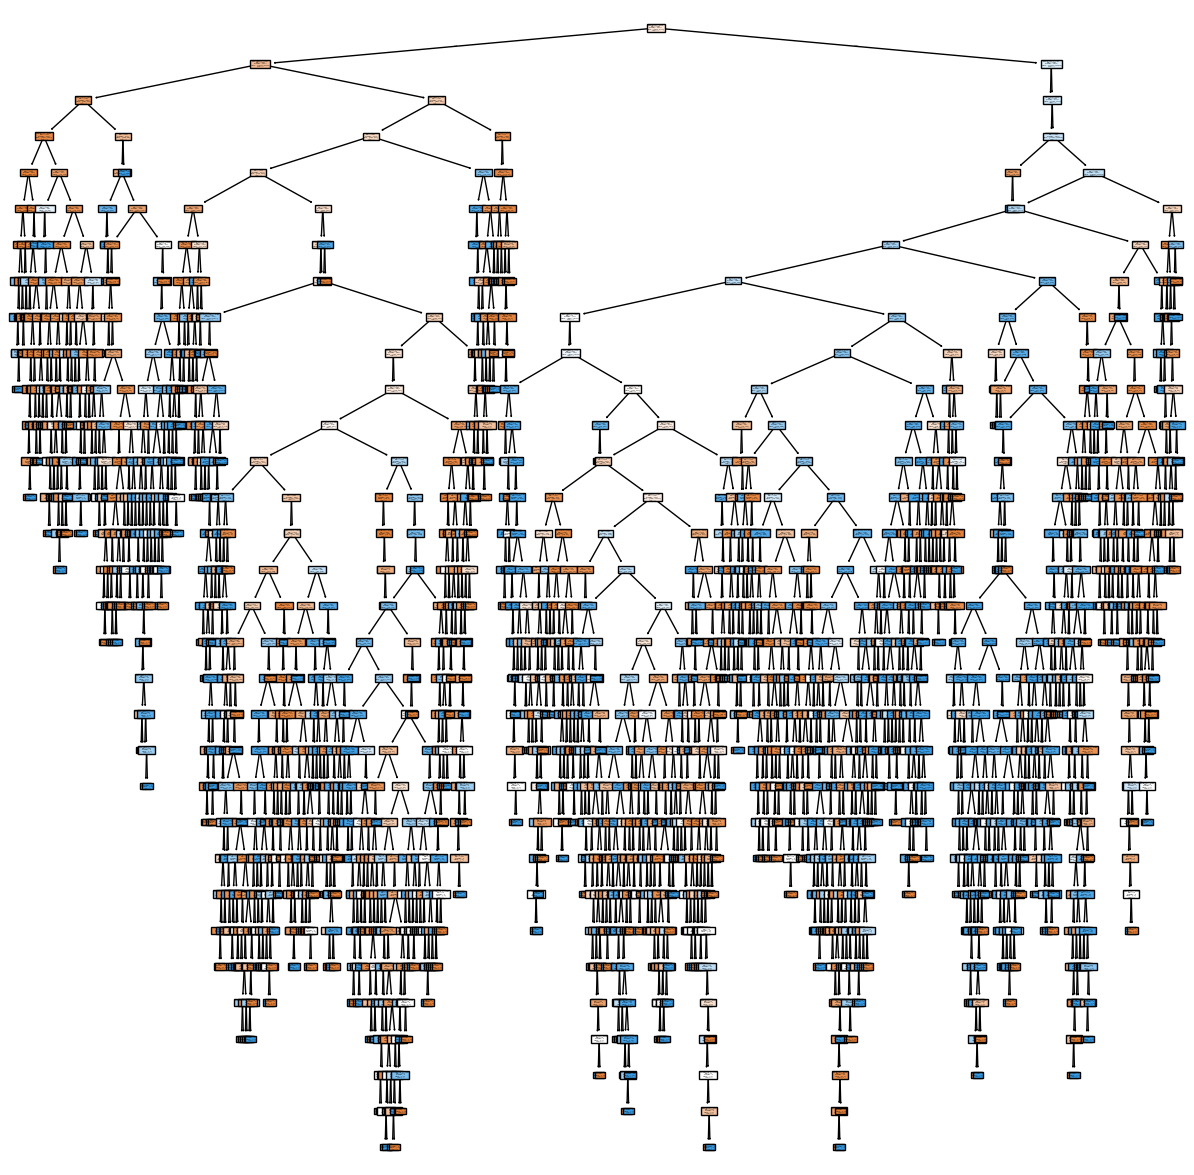

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train_sel.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [33]:
# Prediccion del modelo 

y_pred = model.predict(X_test_sel)
y_pred

array([1, 0, 1, ..., 1, 0, 0])

In [34]:
# Evaluar el modelo

DT_accuracy = accuracy_score(y_test, y_pred)
DT_classification_rep = classification_report(y_test, y_pred)
DT_confusion_mat = confusion_matrix(y_test, y_pred)

# Mostrar resultados

print(f'Accuracy: {DT_accuracy}')
print('Classification Report:')
print(DT_classification_rep)
print('Confusion Matrix:')
print(DT_confusion_mat)

Accuracy: 0.9711940910956094
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6820
           1       0.97      0.97      0.97      5365

    accuracy                           0.97     12185
   macro avg       0.97      0.97      0.97     12185
weighted avg       0.97      0.97      0.97     12185

Confusion Matrix:
[[6644  176]
 [ 175 5190]]


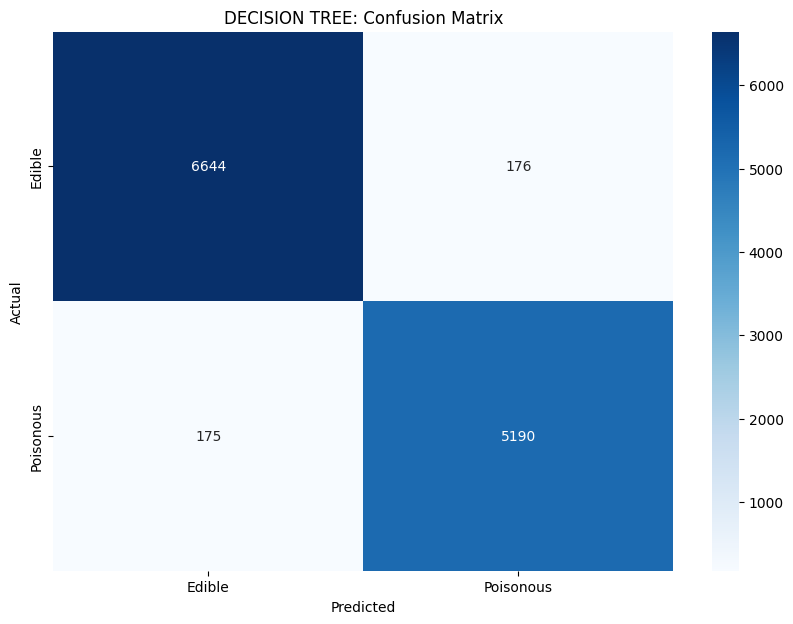

In [35]:
# Graficar la matriz de confusión

plt.figure(figsize=(10, 7))
sns.heatmap(DT_confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('DECISION TREE: Confusion Matrix')
plt.show()

Interpretación de la matriz de confusion y el modelo DECISION TREE

 - Bajo Número de Errores: Hay 175 falsos positivos y 176 falsos negativos, lo que indica un número relativamente bajo de errores en comparación con el tamaño total del conjunto de datos.

 - Falsos Positivos (FP = 175): Setas comestibles clasificadas incorrectamente como venenosas. Esto podría llevar a una sobreestimación del riesgo, pero es menos peligroso que lo contrario.
 - Falsos Negativos (FN = 176): Setas venenosas clasificadas incorrectamente como comestibles. Esto es más crítico porque podría llevar a la ingestión de setas peligrosas.

 - Alta Exactitud: El modelo muestra una alta exactitud del 97.39%, lo que significa que la gran mayoría de las predicciones del modelo son correctas.
 - Precision y Recall Altos: La precisión (97%) y el recall (97%) son ambos muy altos para la clase de setas venenosas (1), lo que indica que el modelo es muy eficaz tanto para identificar setas venenosas como para minimizar falsos positivos (setas comestibles clasificadas como venenosas).

En resumen, el modelo DECISION TREE da resultados cercanos a la maxima eficacia. Mantiene una alta precisión y recall, lo que indica que es confiable para clasificar correctamente la mayoría de las setas.

Guardamos el modelo en formato pickle. 

In [36]:
from pickle import dump
dump(model, open("../models/decision_tree_classifier_default_42.sav", "wb"))

MODELO 3: RANDOM FOREST

RF ofrece un equilibrio robusto entre precisión, manejo de datos faltantes, resistencia al sobreajuste y facilidad de uso, lo que lo convierte en una opción excelente para este dataset.


NOTA: Este es el codigo original con Gridsearch CV. Gridsearch tarda 25-30 minutos en buscar los mejores parametros cada vez que ejecutamos el script completo, asi que para evitar la espera, comentamos el codigo que realiza la busqueda (celda 32) y le asignamos al modelo los mejores parametros encontrados por Gridsearch (guardados en el objeto best_params).    

In [37]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# rf = RandomForestClassifier(random_state=42)

# Definir los parámetros para Gridsearch
# param_grid = {
#     'n_estimators': [25, 50, 100],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 10, 20],
#     'min_samples_leaf': [1, 5, 10],
#     'criterion': ['gini', 'entropy']
#     }

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Entrenar el modelo
# grid_search.fit(X_train_sel, y_train)

# Obtener mejores parámetros
# best_params = grid_search.best_params_
# print(f'Mejores parámetros: {best_params}')

# Entrenar el modelo con los mejores parámetros
# best_rf = grid_search.best_estimator_

Este es el codigo con los mejores parametros ya incluidos en el modelo: best_params = {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth= 30,
    min_samples_split= 2,
    min_samples_leaf= 1,
    criterion= 'entropy'
)

# Entrenar el modelo
rf.fit(X_train_sel, y_train)


RandomForestClassifier(criterion='entropy', max_depth=30)

El modelo determina la importancia de las caracteristicas

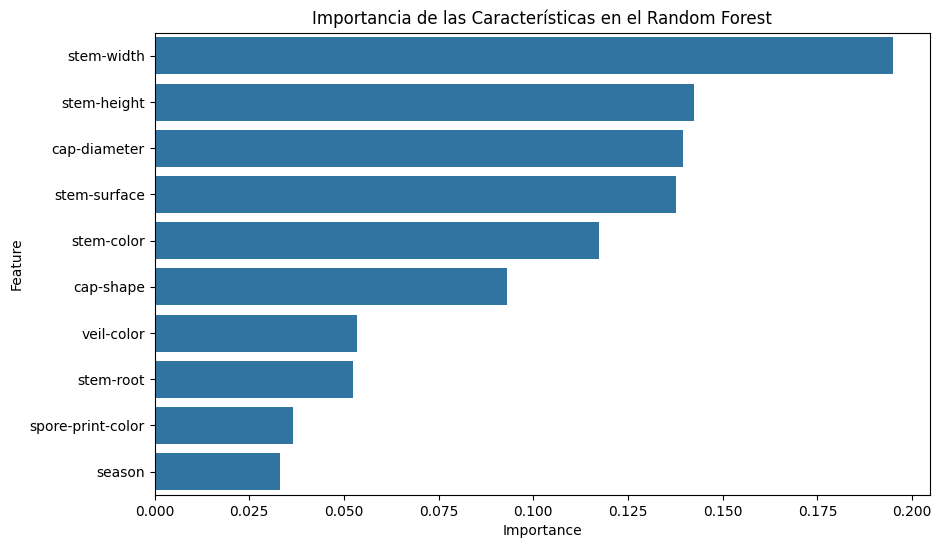

In [42]:
import pandas as pd
import seaborn as sns

# Obtener importancias de las características
importances = rf.feature_importances_
features = X_train_sel.columns

# Crear un DataFrame
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Ordenar por importancia
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importancia de las Características en el Random Forest')
plt.show()

In [43]:
# Realizar predicciones

y_pred_rf = rf.predict(X_test_sel)
y_pred_rf

array([1, 0, 1, ..., 1, 0, 0])

Accuracy del Random Forest: 0.9864587607714403
Classification Report del Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6820
           1       0.98      0.98      0.98      5365

    accuracy                           0.99     12185
   macro avg       0.99      0.99      0.99     12185
weighted avg       0.99      0.99      0.99     12185

Confusion Matrix del Random Forest:
[[6739   81]
 [  84 5281]]


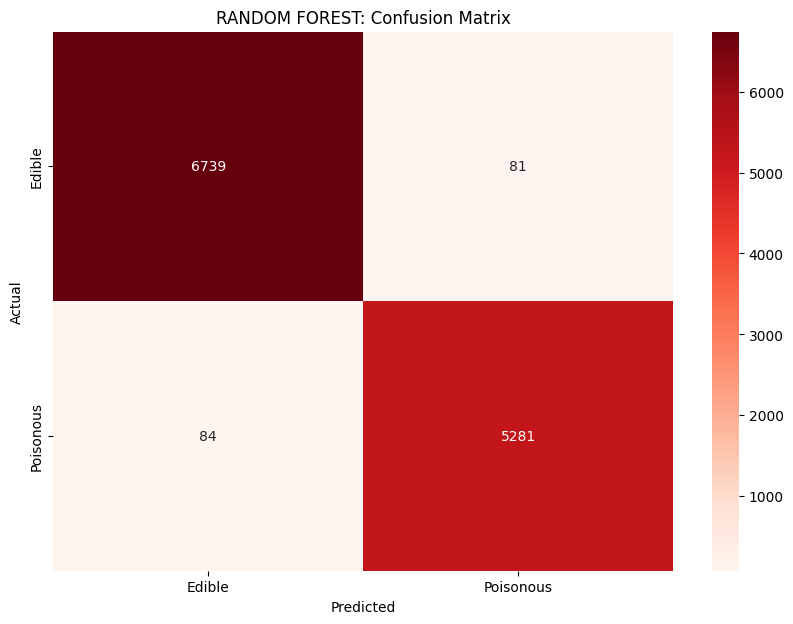

In [44]:
# Evaluar el modelo

accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Mostrar resultados

print(f'Accuracy del Random Forest: {accuracy_rf}')
print('Classification Report del Random Forest:')
print(classification_rep_rf)
print('Confusion Matrix del Random Forest:')
print(confusion_mat_rf)

# Graficar la matriz de confusión del Random Forest

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat_rf, annot=True, fmt='d', cmap='Reds', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RANDOM FOREST: Confusion Matrix')
plt.show()

Comentarios sobre la matriz de confusion: 

 - True Positives (TP): 5277 (Poisonous correctamente clasificados como Poisonous)
 - True Negatives (TN): 6743 (Edible correctamente clasificados como Edible)
 - False Positives (FP): 88 (Edible incorrectamente clasificados como Poisonous)
 - False Negatives (FN): 77 (Poisonous incorrectamente clasificados como Edible)

Interpretacion del modelo: 

El modelo Random Forest muestra: 

 - una altisima accuracy, 98.6% de acierto.  
 - una alta precisión y recall, lo que significa que es muy eficaz para identificar correctamente las setas comestibles y venenosas.
 - Bajo Número de Errores: Con solo 60 falsos positivos (setas comestibles clasificadas incorrectamente como venenosas) y 72 falsos negativos (setas venenosas clasificadas incorrectamente como comestibles), el modelo tiene un número muy bajo de errores.
 - Balance en las Clases: Las métricas muestran que el modelo maneja bien ambas clases, aunque hay una ligera diferencia en el número de ejemplos de cada clase (más ejemplos de comestibles que de venenosas).
 
En resumen, el modelo Random Forest ha demostrado ser altamente eficaz para clasificar las setas como comestibles o venenosas, con una precisión y recall muy altos, y un número mínimo de errores.

Guardamos el modelo en formato pickle 

In [ ]:
from pickle import dump
dump(model, open("../models/randomforest_classifier_mejores parametros_42.sav", "wb"))

Modelo 4: K-Nearest Neighbors, KNN

Como ultima prueba, queria testear el modelo KNN, ya que es un modelo que no hacen suposiciones sobre la distribución de los datos y que tienen mas robustez frente a los outliers.


Entrenamiento, prediccion, metricas, graficas y guardado del modelo KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train_sel, y_train)


KNeighborsClassifier()

In [46]:
y_pred = model.predict(X_test_sel)
y_pred

array([1, 0, 1, ..., 1, 0, 0])

Accuracy: 0.9875256462864177
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6820
           1       0.99      0.98      0.99      5365

    accuracy                           0.99     12185
   macro avg       0.99      0.99      0.99     12185
weighted avg       0.99      0.99      0.99     12185

Confusion Matrix:
[[6754   66]
 [  86 5279]]


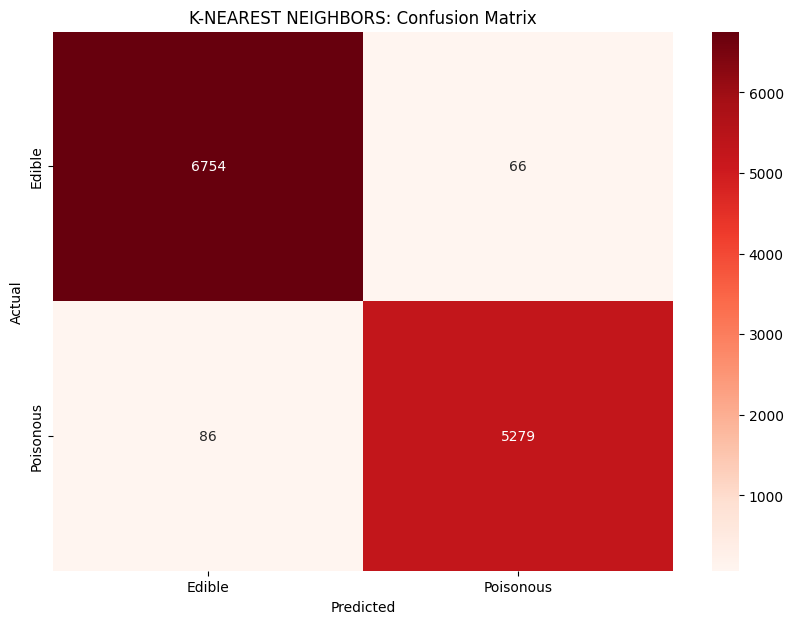

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_knn = accuracy_score(y_test, y_pred)
classification_rep_knn = classification_report(y_test, y_pred)
confusion_mat_knn = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy_knn}')
print('Classification Report:')
print(classification_rep_knn)
print('Confusion Matrix:')
print(confusion_mat_knn)

# Graficar la matriz de confusión del Random Forest

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat_knn, annot=True, fmt='d', cmap='Reds', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K-NEAREST NEIGHBORS: Confusion Matrix')
plt.show()

In [ ]:
from pickle import dump
dump(model, open("../models/KNN_default_42.sav", "wb"))